In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
#from wordcloud import WordCloud, STOPWORDS
from collections import OrderedDict

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [13]:
data = pd.read_csv("data/train.csv")
test=pd.read_csv("data/test.csv")

In [14]:
data.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [15]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
id                       3000 non-null int64
belongs_to_collection    604 non-null object
budget                   3000 non-null int64
genres                   2993 non-null object
homepage                 946 non-null object
imdb_id                  3000 non-null object
original_language        3000 non-null object
original_title           3000 non-null object
overview                 2992 non-null object
popularity               3000 non-null float64
poster_path              2999 non-null object
production_companies     2844 non-null object
production_countries     2945 non-null object
release_date             3000 non-null object
runtime                  2998 non-null float64
spoken_languages         2980 non-null object
status                   3000 non-null object
tagline                  2403 non-null object
title                    3000 non-null object
Keywords             

In [16]:
#first removing features which are irrelevant for our prediction
data.drop(['imdb_id','poster_path'],axis=1,inplace=True)
test.drop(['imdb_id','poster_path'],axis=1,inplace=True)

In [17]:
# Converting HomePage to binary 
data['has_homepage'] = 0
data.loc[data['homepage'].isnull() == False, 'has_homepage'] = 1
test['has_homepage'] = 0
test.loc[test['homepage'].isnull() == False, 'has_homepage'] = 1

In [18]:
# drop home_page
data=data.drop(['homepage'],axis =1)
test=test.drop(['homepage'],axis =1)

In [19]:
#Converting collections as binary
data['collection'] = 0
data.loc[data['belongs_to_collection'].isnull() == False, 'collection'] = 1
test['collection'] = 0
test.loc[test['belongs_to_collection'].isnull() == False, 'collection'] = 1

In [20]:
#drop belongs_to_collection
data=data.drop(['belongs_to_collection'],axis =1)
test=test.drop(['belongs_to_collection'],axis =1)

In [21]:
#adding number of genres for each movie
genres_count=[]
for i in data['genres']:
    if(not(pd.isnull(i))):
        
        genres_count.append(len(eval(i)))
        
    else:
        genres_count.append(0)
data['num_genres'] = genres_count

In [22]:
data.head()


,id,budget,genres,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,...,status,tagline,title,Keywords,cast,crew,revenue,has_homepage,collection,num_genres
0,1,14000000,"[{'id': 35, 'name': 'Comedy'}]",en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,...,Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,0,1,1
1,2,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,...,Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,0,1,4
2,3,3300000,"[{'id': 18, 'name': 'Drama'}]",en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,...,Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,1,0,1
3,4,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,...,Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,1,0,2
4,5,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",ko,마린보이,Marine Boy is the story of a former national s...,1.148070,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,...,Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,0,0,2


In [23]:
#Adding genres count for test data
genres_count_test=[]
for i in test['genres']:
    if(not(pd.isnull(i))):
        
        genres_count_test.append(len(eval(i)))
        
    else:
        genres_count_test.append(0)
test['num_genres'] = genres_count_test

In [24]:
#Dropping genres
data.drop(['genres'],axis=1, inplace = True)
test.drop(['genres'],axis=1, inplace = True)

In [25]:
#Production companies
#Adding production_companies count for  data
prod_comp_count=[]
for i in data['production_companies']:
    if(not(pd.isnull(i))):
        
        prod_comp_count.append(len(eval(i)))
        
    else:
        prod_comp_count.append(0)
data['num_prod_companies'] = prod_comp_count

In [26]:
#Adding production_companies count for  test data
prod_comp_count_test=[]
for i in test['production_companies']:
    if(not(pd.isnull(i))):
        
        prod_comp_count_test.append(len(eval(i)))
        
    else:
        prod_comp_count_test.append(0)
test['num_prod_companies'] = prod_comp_count_test

In [27]:
#Dropping production_companies
data.drop(['production_companies'],axis=1, inplace = True)
test.drop(['production_companies'],axis=1, inplace = True)

In [28]:
#production_countries
#Adding production_countries count for  data
prod_coun_count=[]
for i in data['production_countries']:
    if(not(pd.isnull(i))):
        
        prod_coun_count.append(len(eval(i)))
        
    else:
        prod_coun_count.append(0)
data['num_prod_countries'] = prod_coun_count

In [29]:
#Adding production_countries count for  test data
prod_coun_count_test=[]
for i in test['production_countries']:
    if(not(pd.isnull(i))):
        
        prod_coun_count_test.append(len(eval(i)))
        
    else:
        prod_coun_count_test.append(0)
test['num_prod_countries'] = prod_coun_count_test

In [30]:
#Dropping production_countries
data.drop(['production_countries'],axis=1, inplace = True)
test.drop(['production_countries'],axis=1, inplace = True)

In [31]:
data.head()


,id,budget,original_language,original_title,overview,popularity,release_date,runtime,spoken_languages,status,...,title,Keywords,cast,crew,revenue,has_homepage,collection,num_genres,num_prod_companies,num_prod_countries
0,1,14000000,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,0,1,1,3,1
1,2,40000000,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,0,1,4,1,1
2,3,3300000,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,1,0,1,3,1
3,4,1200000,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,...,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,1,0,2,0,1
4,5,0,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,...,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,0,0,2,0,1


In [32]:
#handling overview
#mapping overview present to 1 and nulls to 0
data['overview']=data['overview'].apply(lambda x: 0 if pd.isnull(x) else 1)
test['overview']=test['overview'].apply(lambda x: 0 if pd.isnull(x) else 1)

In [33]:
data= data.drop(['overview'],axis=1)
test= test.drop(['overview'],axis=1)

In [34]:
#cast
#Adding cast count for  data
total_cast=[]
for i in data['cast']:
    if(not(pd.isnull(i))):
        
        total_cast.append(len(eval(i)))
        
    else:
        total_cast.append(0)
data['cast_count'] = total_cast

In [35]:
#cast
#Adding cast count for  test data
total_cast=[]
for i in test['cast']:
    if(not(pd.isnull(i))):
        
        total_cast.append(len(eval(i)))
        
    else:
        total_cast.append(0)
test['cast_count'] = total_cast

In [36]:
#Dropping cast
data= data.drop(['cast'],axis=1)
test= test.drop(['cast'],axis=1)

In [37]:
#crew
total_crew=[]
for i in data['crew']:
    if(not(pd.isnull(i))):
        
        total_crew.append(len(eval(i)))
        
    else:
        total_crew.append(0)
data['crew_count'] = total_crew

In [38]:

#Adding crew count for  test data
total_crew=[]
for i in test['crew']:
    if(not(pd.isnull(i))):
        
        total_crew.append(len(eval(i)))
        
    else:
        total_crew.append(0)
test['crew_count'] = total_crew

In [39]:
#Dropping crew
data= data.drop(['crew'],axis=1)
test= test.drop(['crew'],axis=1)

In [40]:
#Dropping original_title
data= data.drop(['original_title'],axis=1)
test= test.drop(['original_title'],axis=1)

In [41]:
#Taking only en and zh into consideration as they are the highest grossing
data['original_language'] =data['original_language'].apply(lambda x: 1 if x=='en' else(2 if x=='zh' else 0))
test['original_language'] =test['original_language'].apply(lambda x: 1 if x=='en' else(2 if x=='zh' else 0))

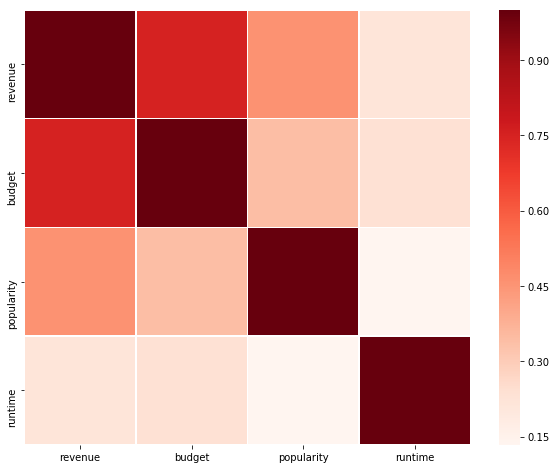

In [43]:
#check correlation between variables
col = ['revenue','budget','popularity','runtime']

plt.subplots(figsize=(10, 8))

corr = data[col].corr()

sns.heatmap(corr, xticklabels=col,yticklabels=col, linewidths=.5, cmap="Reds")

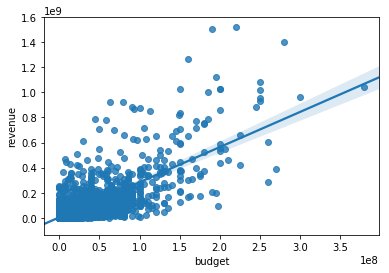

In [44]:
#budget and revenue are highly correlated
sns.regplot(x="budget", y="revenue", data=data)

In [45]:
#Check how revenue depends of day
data['release_date']=pd.to_datetime(data['release_date'])
test['release_date']=pd.to_datetime(data['release_date'])

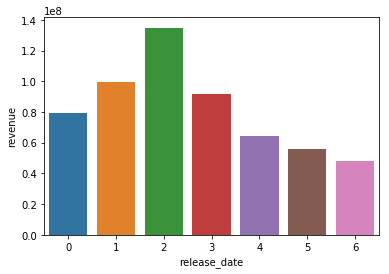

In [46]:
release_day = data['release_date'].value_counts().sort_index()
release_day_revenue= data.groupby(['release_date'])['revenue'].sum()
release_day_revenue.index=release_day_revenue.index.dayofweek
sns.barplot(release_day_revenue.index,release_day_revenue, data = data,ci=None)
plt.show()

In [47]:
#adding day feature to the data

data['release_day']=data['release_date'].dt.dayofweek 
test['release_day']=test['release_date'].dt.dayofweek 

In [48]:
#filling nulls in test
test['release_day']=test['release_day'].fillna(0)

In [49]:
data.drop(['release_date'],axis=1,inplace=True)
test.drop(['release_date'],axis=1,inplace=True)

In [50]:
#status
print("train data")
print(data['status'].value_counts())
print("test data")
test['status'].value_counts()

train data
Released    2996
Rumored        4
Name: status, dtype: int64
test data


Released           4389
Post Production       5
Rumored               2
Name: status, dtype: int64

In [51]:
#Feature is irrelevant hence dropping
data.drop(['status'],axis=1,inplace =True)
test.drop(['status'],axis=1,inplace =True)

In [52]:
#keywords
Keywords_count=[]
for i in data['Keywords']:
    if(not(pd.isnull(i))):
        
        Keywords_count.append(len(eval(i)))
        
    else:
        Keywords_count.append(0)
data['Keywords_count'] = Keywords_count

In [53]:
Keywords_count=[]
for i in test['Keywords']:
    if(not(pd.isnull(i))):
        
        Keywords_count.append(len(eval(i)))
        
    else:
        Keywords_count.append(0)
test['Keywords_count'] = Keywords_count

In [54]:
#Dropping title and keywords
data=data.drop(['Keywords'],axis=1)
data=data.drop(['title'],axis=1)
test=test.drop(['Keywords'],axis=1)
test=test.drop(['title'],axis=1)

In [55]:
#tagline
data['isTaglineNA'] = 0
data.loc[data['tagline'].isnull() == False, 'isTaglineNA'] = 1
test['isTaglineNA'] = 0
test.loc[test['tagline'].isnull() == False, 'isTaglineNA'] = 1

In [56]:
data.drop(['tagline'],axis=1,inplace =True)
test.drop(['tagline'],axis=1,inplace =True)

In [57]:
#runtime has 2 nulls; setting it to the mean
#filling nulls in test
data['runtime']=data['runtime'].fillna(data['runtime'].mean())
test['runtime']=test['runtime'].fillna(test['runtime'].mean())

In [58]:
#spoken languages
#adding number of spoken languages for each movie
spoken_count=[]
for i in data['spoken_languages']:
    if(not(pd.isnull(i))):
        
        spoken_count.append(len(eval(i)))
        
    else:
        spoken_count.append(0)
data['spoken_count'] = spoken_count


spoken_count_test=[]
for i in test['spoken_languages']:
    if(not(pd.isnull(i))):
        
        spoken_count_test.append(len(eval(i)))
        
    else:
        spoken_count_test.append(0)
test['spoken_count'] = spoken_count_test

In [59]:
#dropping spoken_languages
data.drop(['spoken_languages'],axis=1,inplace=True)
test.drop(['spoken_languages'],axis=1,inplace=True)

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
id                    3000 non-null int64
budget                3000 non-null int64
original_language     3000 non-null int64
popularity            3000 non-null float64
runtime               3000 non-null float64
revenue               3000 non-null int64
has_homepage          3000 non-null int64
collection            3000 non-null int64
num_genres            3000 non-null int64
num_prod_companies    3000 non-null int64
num_prod_countries    3000 non-null int64
cast_count            3000 non-null int64
crew_count            3000 non-null int64
release_day           3000 non-null int64
Keywords_count        3000 non-null int64
isTaglineNA           3000 non-null int64
spoken_count          3000 non-null int64
dtypes: float64(2), int64(15)
memory usage: 398.5 KB


In [61]:
data.head()

,id,budget,original_language,popularity,runtime,revenue,has_homepage,collection,num_genres,num_prod_companies,num_prod_countries,cast_count,crew_count,release_day,Keywords_count,isTaglineNA,spoken_count
0,1,14000000,1,6.575393,93.0,12314651,0,1,1,3,1,24,72,4,4,1,1
1,2,40000000,1,8.248895,113.0,95149435,0,1,4,1,1,20,9,4,4,1,1
2,3,3300000,1,64.299990,105.0,13092000,1,0,1,3,1,51,64,4,12,1,1
3,4,1200000,0,3.174936,122.0,16000000,1,0,2,0,1,7,3,4,7,0,2
4,5,0,0,1.148070,118.0,3923970,0,0,2,0,1,4,2,3,0,0,1


In [62]:
data['budget'] = np.log1p(data['budget'])
test['budget'] = np.log1p(test['budget'])

In [63]:
# Setting up training
y= data['revenue'].values
cols = [col for col in data.columns if col not in ['revenue', 'id']]
X= data[cols].values
y = np.log1p(y)

In [67]:
# Linear Regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [68]:
# Decision Tree regression
from sklearn.tree import DecisionTreeRegressor
dec_tree_regressor = DecisionTreeRegressor(random_state = 0)
dec_tree_regressor.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [69]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
rf_regressor.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [70]:
# Preparing test data
cols = [col for col in test.columns if col not in ['id']]
X_test= test[cols].values

In [71]:
# submit using linear regression
y_pred_lin_reg = lin_reg.predict(X_test)
y_pred_lin_reg = np.expm1(y_pred_lin_reg)
pd.DataFrame({'id': test.id, 'revenue': y_pred_lin_reg}).to_csv('submission_lin_reg.csv', index=False)

In [72]:
# submit using Decision tree
y_pred_dec_tree = dec_tree_regressor.predict(X_test)
y_pred_dec_tree = np.expm1(y_pred_dec_tree)
pd.DataFrame({'id': test.id, 'revenue': y_pred_dec_tree}).to_csv('submission_dec_tree.csv', index=False)

In [73]:
# submit using random forest
y_pred_rf = rf_regressor.predict(X_test)
y_pred_rf = np.expm1(y_pred_rf)
pd.DataFrame({'id': test.id, 'revenue': y_pred_rf}).to_csv('submission_rf.csv', index=False)